VISUALIZZO

In [2]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 20
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['lines.linewidth'] = 0.2
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
from acf_utils import *
import ou

In [42]:
#path_v = '../databases/gaussian_process.npy'
#db = np.load(path_v)
path_vn = '../databases/gaussian_process_smooth.npy'
dbn = np.load(path_vn)
#dba = np.gradient(db,axis=1)
#dban = np.gradient(dbn,axis=1)

NameError: name 'db' is not defined

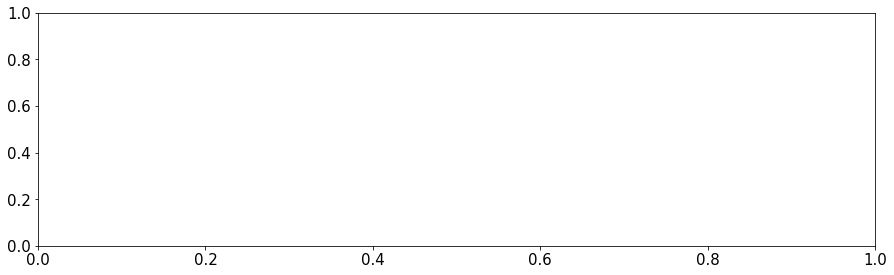

In [37]:
plt.figure(figsize=(15,5*6))
start=0
end=1999
for i in range(1,6):
    plt.subplot(6,1,i)
    plt.plot(np.arange(start,end),db[i,start:end])
    plt.plot(np.arange(start,end),dbn[i,start:end])
    plt.xlabel("t")
    plt.ylabel("$\\xi(t)$")
plt.tight_layout()
plt.show()

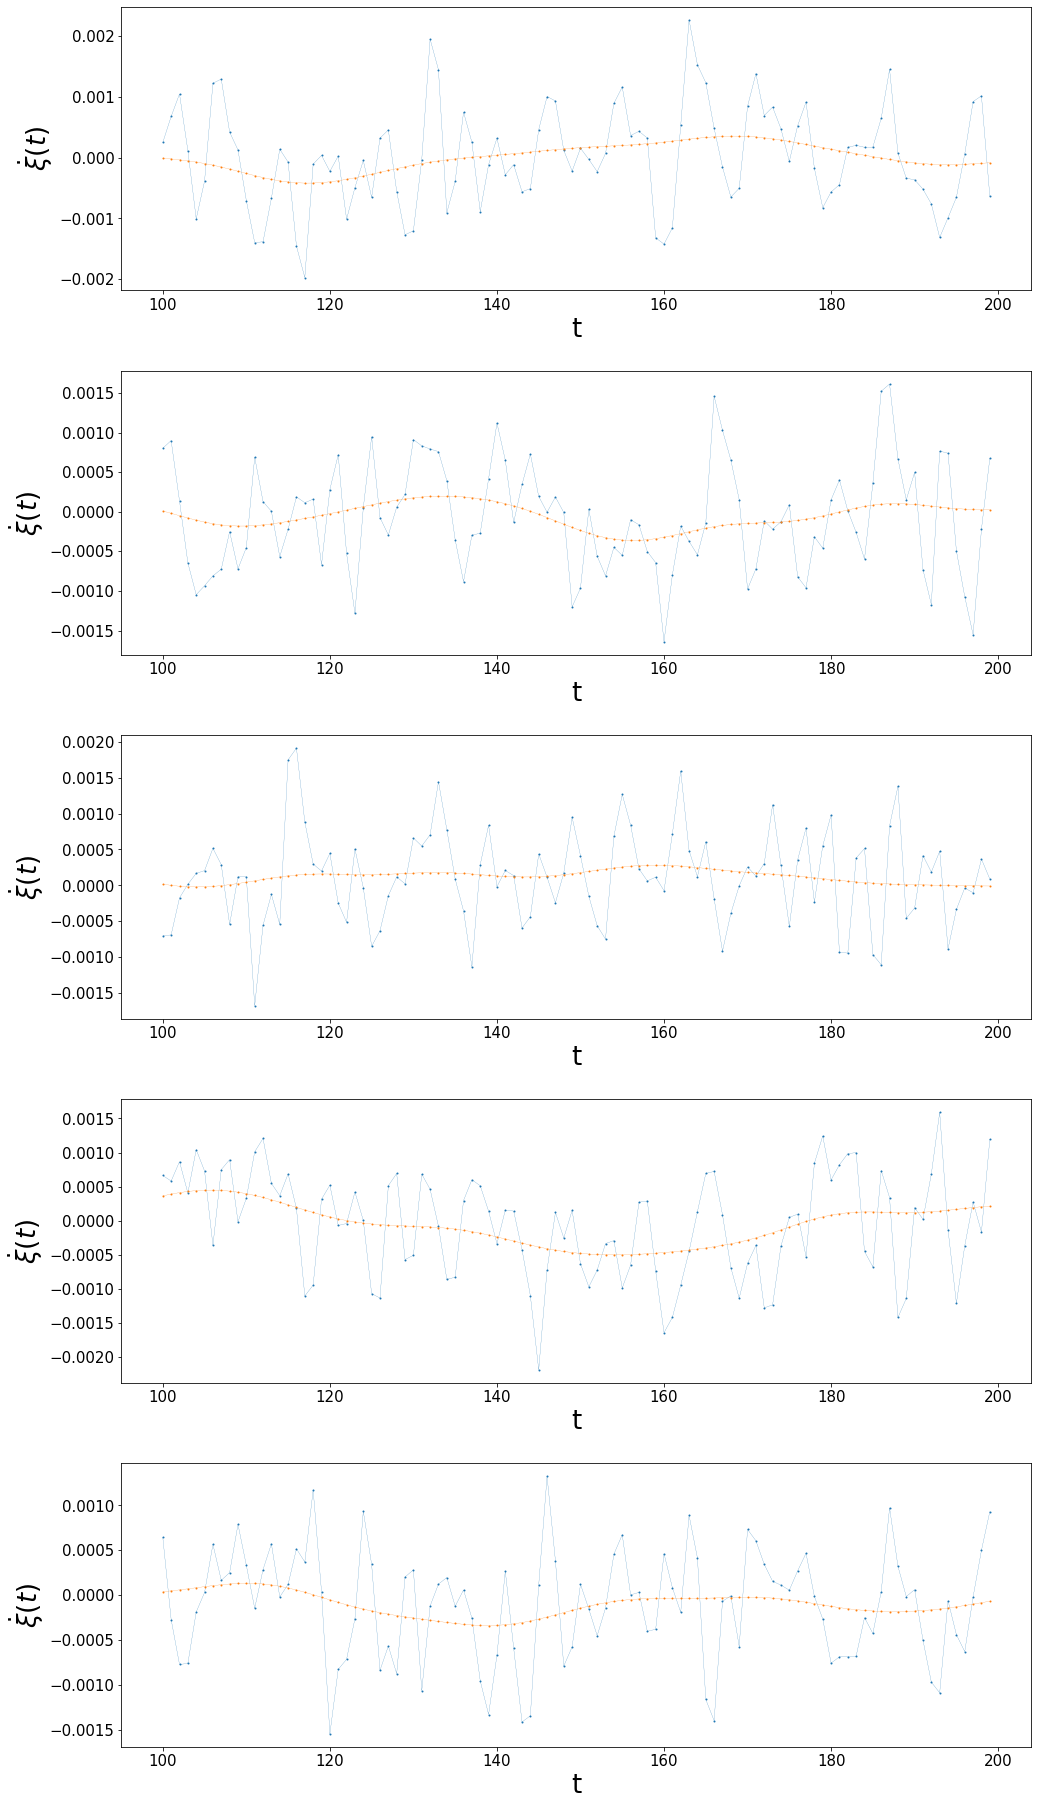

In [41]:
plt.figure(figsize=(15,5*6))
start=100
end=start+100
for i in range(1,6):
    plt.subplot(6,1,i)
    plt.plot(np.arange(start,end),dba[i,start:end])
    plt.plot(np.arange(start,end),dban[i,start:end])
    plt.xlabel("t")
    plt.ylabel("$\\dot\\xi(t)$")
plt.tight_layout()
plt.show()

In [43]:
dba = np.gradient(dbn, axis=1)
#np.save('../databases/gaussian_acc_smooth',dba)
#path_a = '../databases/gaussian_acc_smooth.npy'
#dba = np.load(path_a)
dbaa = np.gradient(dba, axis=1)
#np.save('../databases/gaussian_aacc',dbaa)
#path_aa = '../databases/gaussian_aacc_smooth.npy'
#dbaa = np.load(path_aa)

1


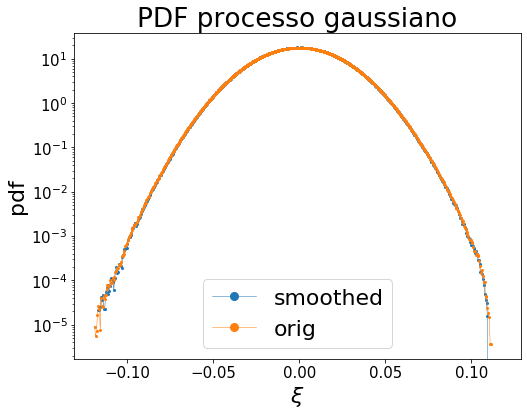

In [44]:
bins=create_log_bins(dbn.min(),dbn.max(),2000,1e-3)
hist, bin_edges = np.histogram(dbn.flatten(), bins=bins, density=True)
print(save_pdf(bin_edges, hist, 'data/real/pdf_vx_smooth'))
hist, bin_edges = load_pdf('data/real/pdf_vx_smooth')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='smoothed')
hist, bin_edges = load_pdf('data/real/pdf_vx')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='orig')
plt.yscale('log')
plt.title(f'PDF processo gaussiano')#\nkurtosis={kurtosis(bin_edges, hist):.2f}')
plt.ylabel('pdf')
plt.xlabel('$\\xi$')
plt.legend()
plt.savefig('plots/real/pdf_vel',fmt='png',dpi=100)

1


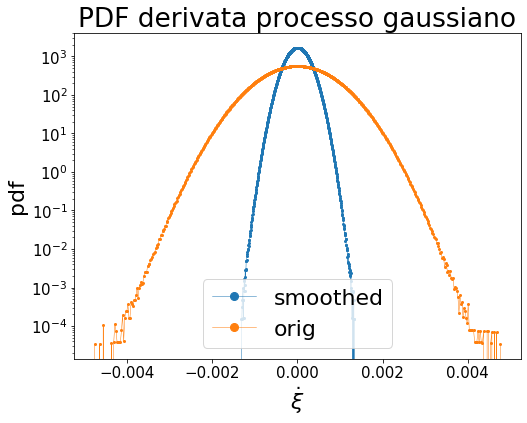

In [45]:
bins=create_log_bins(dba.min(),dba.max(),2000,1e-5)
hist, bin_edges = np.histogram(dba.flatten(), bins=bins, density=True)
print(save_pdf(bin_edges, hist, 'data/real/pdf_ax_smooth'))
hist, bin_edges = load_pdf('data/real/pdf_ax_smooth')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='smoothed')
hist, bin_edges = load_pdf('data/real/pdf_ax')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='orig')
plt.yscale('log')
plt.title('PDF derivata processo gaussiano')#\nkurtosis={kurtosis(bin_edges, hist):.2f}')
plt.ylabel('pdf')
plt.xlabel('$\\dot{\\xi}$')
plt.legend()
plt.savefig('plots/real/pdf_acc',fmt='png',dpi=100)

1


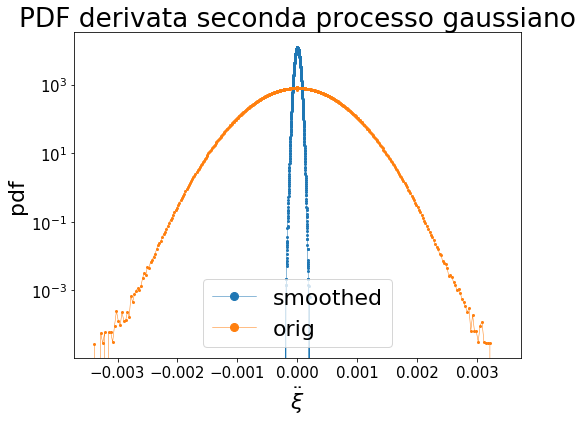

In [46]:
bins=create_log_bins(dbaa.min(),dbaa.max(),2000,1e-7)
hist, bin_edges = np.histogram(dbaa.flatten(), bins=bins, density=True)
print(save_pdf(bin_edges, hist, 'data/real/pdf_aax_smooth'))
hist, bin_edges = load_pdf('data/real/pdf_aax_smooth')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='smoothed')
hist, bin_edges = load_pdf('data/real/pdf_aax')
plt.plot(bin_edges, hist, lw=0.5, marker='.',ms=4,label='orig')
plt.yscale('log')
plt.title('PDF derivata seconda processo gaussiano')#\nkurtosis={kurtosis(bin_edges, hist):.2f}')
plt.ylabel('pdf')
plt.xlabel('$\\ddot{\\xi}$')
plt.legend()
plt.savefig('plots/real/pdf_aacc',fmt='png',dpi=100)

### Calcolo tutte le acf delle velocità reali

In [19]:
dbn = db.reshape(db.shape[0],db.shape[1],1)

In [ ]:
acfg = acf_x(dbn,npart=500000)
#mean = np.load('../databases/velocities_acf_mean_and_std.npy')[0,:,0]
plt.figure(figsize=(8,6))
plt.plot(acfg, label='Real')
#np.save(f'../databases/gaussian_process_acf',acfg)

### Calcolo tutte le acf delle accelerazioni reali

In [31]:
from acf_utils import *
#paths = ['../databases/velocities_acf.npy']
#exit_time(paths, 0.5)

computing exit time for 327679 Saved!


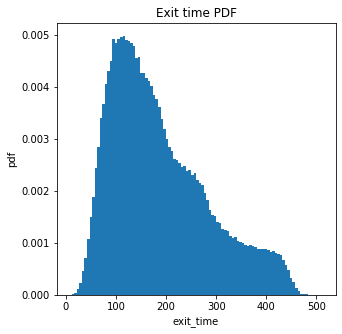

In [33]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_gaussian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/real/pdf_exit_time')
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.savefig('plots/real/pdf_exit_time',fmt='png',dpi=100)

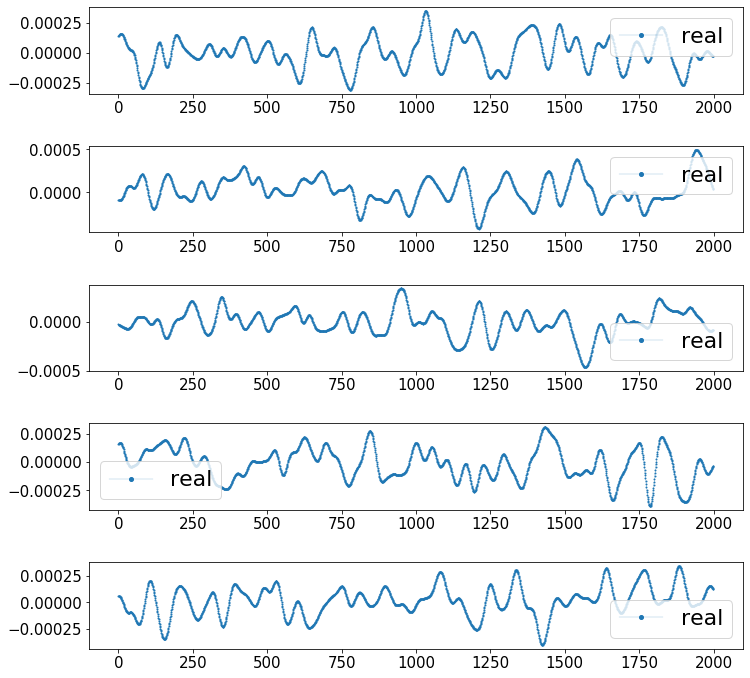

In [22]:
idx1 = np.arange(0,5)
trajs = dba[idx1]
plt.figure(figsize=(11,2*len(trajs)))
plt.title('esempi di traiettorie reali')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs), 1, i+1)
    plt.plot(traj, label='real')
    plt.legend()

plt.tight_layout()
plt.savefig(f'plots/real/real_trajs.png', fmt='png', dpi=100)
plt.show()

## Calcolo funzioni di struttura Lagrangiane di ordine p: $$ S_p^L(\tau) = <(v_x(t+\tau)-(v_x(t))^p> $$

## Kurtosis o Flatness: $$ K^L(\tau) = \frac{S_4^L(\tau)}{[S_2^L(\tau)]^2} $$

In [33]:
import compute_struct as st

path_vn = '../databases/gaussian_process_smooth2.npy'
dbn = np.load(path_vn)
struct_realss = st.compute_structure_function(dbn,50000)

Database shape ok, continuing...
Database larger than npart. Taken 50000 samples randomly.
Converting database to fortran order


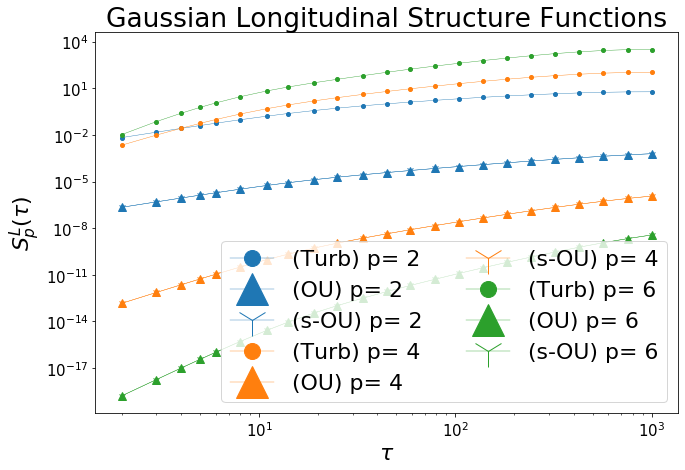

In [49]:
npart = 500000
struct_reals = np.load(f"data/real/struct_function_{npart}_part.npy")
struct_real = np.load(f"../lagrangian/data/real/struct_function_327680_part.npy")
struct_reals = np.load(f"data/real/struct_function_{npart}_part_smooth.npy")

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})


plt.figure(figsize=(10,7))
plt.title("Gaussian Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(Turb) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_reals[:,0],struct_reals[:,ii],label="(OU) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_realss[:,0],struct_realss[:,ii],label="(s-OU) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C'+str(ii-1))

plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func",fmt="png",dpi=60)
plt.show()

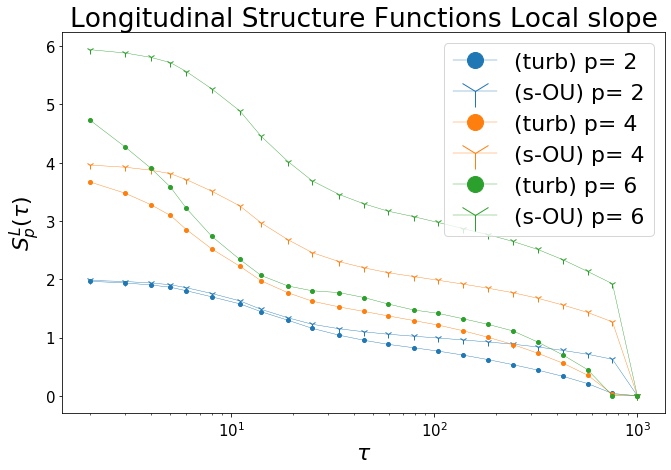

In [50]:
struct_real_log = np.log(struct_real)
dl_struct_real = np.zeros(shape=struct_real.shape)
struct_real_logs = np.log(struct_real)
dl_struct_reals = np.zeros(shape=struct_real.shape)
struct_real_logss = np.log(struct_realss)
dl_struct_realss = np.zeros(shape=struct_real.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_reals[jj,ii] = (np.log(struct_reals[jj+1,ii]) - np.log(struct_reals[jj,ii]))/(np.log(struct_reals[jj+1,0])-np.log(struct_reals[jj,0]))
        dl_struct_realss[jj,ii] = (np.log(struct_realss[jj+1,ii]) - np.log(struct_realss[jj,ii]))/(np.log(struct_realss[jj+1,0])-np.log(struct_realss[jj,0]))

plt.figure(figsize=(10,7))
plt.title("Longitudinal Structure Functions Local slope")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(turb) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    #plt.plot(struct_reals[:,0],dl_struct_reals[:,ii],label="(OU) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_realss[:,0],dl_struct_realss[:,ii],label="(s-OU) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C'+str(ii-1))
plt.xlabel("$\\tau$")
plt.legend()
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func_loc_slope",fmt="png",dpi=60)
plt.show()

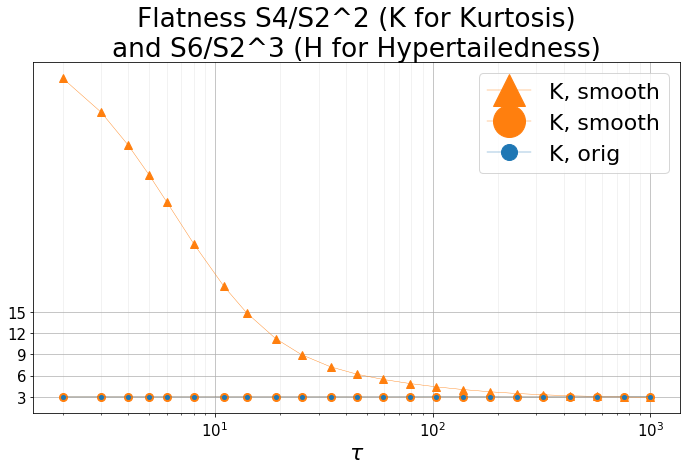

In [78]:
plt.figure(figsize=(10,7))
plt.title("Flatness S4/S2^2 (K for Kurtosis)\nand S6/S2^3 (H for Hypertailedness)")
#plt.yscale('log')
plt.xscale('log')
plt.yticks(np.arange(0,18,3))
#plt.yscale('log')

plt.plot(struct_reals[:,0],struct_reals[:,2]/struct_reals[:,1]**2.,marker='^', label="K, smooth", lw=0.4,ms=8,color='C1')
plt.plot(struct_realss[:,0],struct_realss[:,2]/struct_realss[:,1]**2.,marker='o', label="K, smooth", lw=0.4,ms=8,color='C1')
plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="K, orig", lw=0.4,ms=8,color='C0')

#plt.plot(struct_reals[:,0],struct_reals[:,3]/struct_reals[:,1]**3.,marker='^', label="H, smooth", lw=0.4,ms=8,color='C3')
#plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="H, orig", lw=0.4,ms=8,color='C2')

#plt.ylabel("$K(\\tau)$")
plt.xlabel("$\\tau$")
plt.legend()
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"plots/real/struct_func_flatness",fmt="png",dpi=60)
plt.show()

In [3]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['lines.linewidth'] = 0.1
plt.rcParams['lines.markersize'] = 3
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [10]:
def make_hist(db,n_bins=100,eps=1.e-2,log="True",splits=16):
    from functools import partial
    import concurrent.futures as cf
    splits = 10
    M1, M2 = np.max(diffg), -np.min(diffg)
    estremo = np.max([ M1 , M2 ])
    print(M1, M2)    
    bins1 = np.logspace( np.log10(eps) , np.log10(estremo) ,n_bins)
    bins = np.r_[-bins1g[::-1],0.,bins1g]
    
    with cf.ThreadPoolExecutor(max_workers=splits) as pool:
        chunk = db.shape[0] // splits
        chunks = [db[i*chunk:(i+1)*chunk] for i in range(splits)]
        f = partial(np.histogram, bins=bins, density=True)
        results = pool.map(f, chunks)
        #results = sum(results)
        #pool.shutdown()
    for i in range(len(result)):
        bins[i] = (bins[i]+bins[i+1])/2.
    bins = bins[:-1]
    return np.array([a[0] for a in list(results)]).sum(axis=0), bins

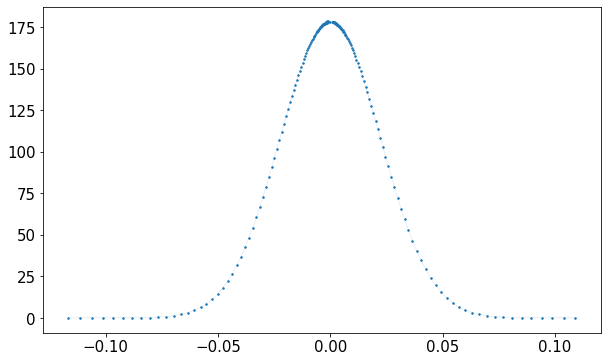

In [12]:
plt.plot(bins,result)

In [81]:
a = lisresults

<generator object Executor.map.<locals>.result_iterator at 0x2b62efbeed58>

In [81]:
struct_real.shape

(23, 4)